<font size="6" color="red"> ch2. 한글 형태소 분석 </font>

# 1. 자연어 처리
- 자연어(사람들이 일상적으로 사용 언어)처리
- 자연어 처리 분야
    - 자연어 이해 : 형태소 분석 -> 패턴 도출
    - 자연어 생성 : 대화분석 -> 다음 문장이나 단어 출력
- 활용분야 : 맞춤법검사, 번역기, 키워드 분석, 쳇봇

# 2. 자연어 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 원형복원, 품사태깅
- 제약조건(불용어 처리)규칙 확인
- 분석(현상시각화 = 워드클라우드, 연관분석, 거리계산, RNN, ...)

# 3.한글 형태소 분석 엔진
- KoNLpy : python용 자연어 처리기(JPype1 패키지를 의존)
        https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
        * KOMORAN : 자바로 만든 형태소 분석기(JAVA_HOME 시스탬 변수)
        * HanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스탬 변수)
        * Kkma : 서울대학교 형태소 분석
- KoNLP : R용 자연어 처리기


In [2]:
%ls JPype1-1.2.0-cp38-cp38-win_amd64.whl

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2878-60C8

 C:\bigdata\src\08_ML_DL\자연어 처리 디렉터리

2021-08-19  오전 09:34         1,610,329 JPype1-1.2.0-cp38-cp38-win_amd64.whl
               1개 파일           1,610,329 바이트
               0개 디렉터리  347,759,505,408 바이트 남음


In [3]:
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

Processing c:\bigdata\src\08_ml_dl\자연어 처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl
  Attempting uninstall: JPype1
    Found existing installation: JPype1 1.3.0
    Uninstalling JPype1-1.3.0:
      Successfully uninstalled JPype1-1.3.0


In [4]:
text = """ 아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용된 언어입니다.

"""


## 3.1 HanNanum

In [6]:
from konlpy.tag import Hannanum
han = Hannanum()
han.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('ㄴ', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

https://konlpy.org
<pre>
    api클릭 -> Comparison between POS tagging classes ->> Korean POS tags comparison chart
    

In [7]:
# 형태소 분석만
print(han.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', 'ㄴ', '언어', '이', 'ㅂ니다', '.']


In [8]:
print(han.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [10]:
print(han.pos(text, ntags=9)) # 디폴트가 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('ㄴ', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [11]:
print(han.pos(text, ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('ㄴ', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [13]:
# 퀴즈 : text중에서 형용사만 추출
tagged_text = han.pos(text, ntags=22)
[t[0] for t in tagged_text if t[1]=='PA']

['아름답', '많']

In [14]:
# 퀴즈 : text중에서 일반명사만 추출
[t[0] for t in tagged_text if t[1]=='NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2 Kkma

In [1]:
text = """ 아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용된 언어입니다.
"""

In [2]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) # 힙메모리 사이즈 늘릴 때 사용
print(kkma.morphs(text))#형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', 'ㄴ', '언어', '이', 'ㅂ니다', '.']


In [3]:
print(kkma.nouns(text))#명사추출

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [4]:
#pos tagging
print(kkma.pos(text)) # ntags 디폴트값은 30

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [5]:
print(kkma.pos(text, 56))

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [6]:
# 보통명사만 추출
tagged_text = kkma.pos(text, 56)
[t[0] for t in tagged_text if t[1]=='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [7]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size = 2024) # heap memory 늘리기
print(komoran.morphs(text)) # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', 'ㄴ', '언어', '이', 'ㅂ니다', '.']


In [8]:
print(komoran.nouns(text)) # 명사만 추출

['한국어', '전', '세계', '번', '사용', '언어']


In [9]:
print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [10]:
# 일반명사(NNG)만 추출
[t[0] for t in komoran.pos(text) if t[1]=='NNG']

['전', '세계', '사용', '언어']

# 4. 말뭉치

In [16]:
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
print("%r" % data[:20])
print('글자수 :', len(data))


'대한민국헌법\n\n유구한 역사와 전통에 '
글자수 : 18884


# 5.워드 클라우드

In [18]:
# 명사들 추출
word_list = komoran.nouns("%r" % data)
print('명사 출현 빈도 : ', len(word_list))
print('출현 명사 갯수 : ', len(set(word_list)))
print('한 단어당 평균 반복 횟수 : ', len(word_list)/len(set(word_list)))
print(type(word_list))
print(word_list[:10])

명사 출현 빈도 :  3361
출현 명사 갯수 :  891
한 단어당 평균 반복 횟수 :  3.772166105499439
<class 'list'>
['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국']


In [22]:
# 워드 클라우드 할 text는 리스트를 하나의 연결된 문자 : '대한민국 헌법 유구 한~'
text = ' '.join(word_list)
text[:100]

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불'

In [ ]:
# 아나콘다 프롬프트(관리자 권한)에서 pip install Wordcloud

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

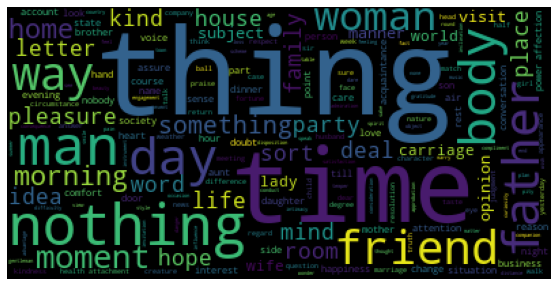

In [26]:
import nltk
from nltk.tokenize import RegexpTokenizer #단어추출
from nltk.tag import pos_tag #품사태깅

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
ret = RegexpTokenizer('[\w]{3,}')
emma_tags = pos_tag(ret.tokenize(emma))
nouns_list = [et[0] for et in emma_tags if et[1]=='NN']
emma = ' '.join(nouns_list) #워드 클라우드에 넣을 문자
wordc = WordCloud()
wordc.generate(emma) #워드클라우드 생성
plt.figure(figsize=(10,5))
plt.imshow(wordc)
plt.axis('off')

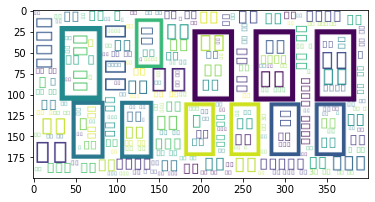

In [27]:
wordc = WordCloud(background_color='white')
wordc.generate(text)
plt.imshow(wordc)

(-0.5, 399.5, 199.5, -0.5)

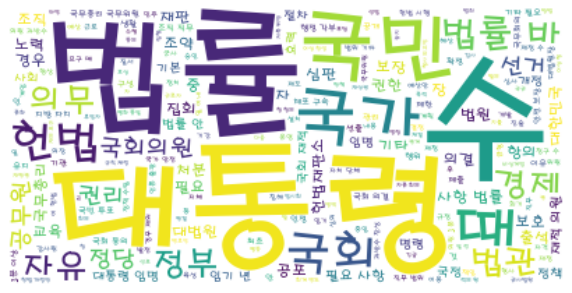

In [29]:
wordcloud = WordCloud(background_color='white',
                      max_words=300,  #최대 등장 단어
                      font_path='C:/Windows/Fonts/HYPost/H2PORM.TTF',
                      relative_scaling=0.2,
                     )
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') #보간법 이용
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

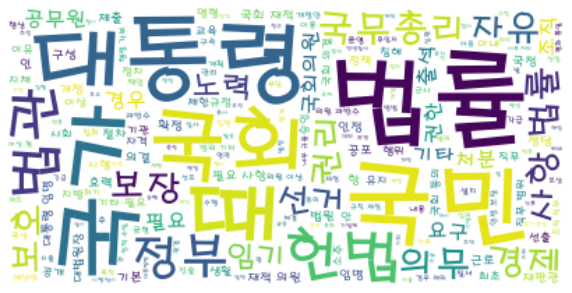

In [31]:
# 일반명사(NNG)
tagged_data = komoran.pos(data)
noun_list = [t[0] for t in tagged_data if t[1]=='NNG']
text = ' '.join(noun_list)

wordcloud = WordCloud(background_color='white',
                      max_words=300,  #최대 등장 단어
                      font_path='C:/Windows/Fonts/HYPost/H2PORM.TTF',
                      relative_scaling=0.2,
                     )
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') #보간법 이용
plt.axis('off')

In [32]:
# 불용어 처리 (불용어 지정 + 불용어 사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | set(['대통령', '때'])
불용어 = set(['대통령', '때'])

(-0.5, 399.5, 199.5, -0.5)

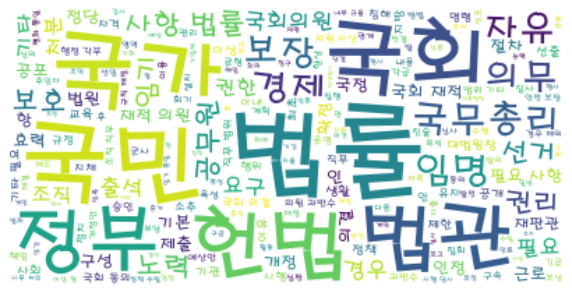

In [33]:
wordcloud = WordCloud(background_color='white',
                      max_words = 200,
                      font_path = 'C:/Windows/Fonts/HYPost/H2PORM.TTF',
                      relative_scaling=0.2,
                      stopwords=불용어)
wordcloud.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [44]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 생성
from PIL import Image
import numpy as np
img = Image.open('test3.png').convert('RGBA') #RGBA는 투명도
# # mask = Image.new('RGB', img.size, (0,0,0))
# # plt.imshow(mask)
# # mask.paste(img)
# # plt.imshow(mask)
# mask = np.arry(mask)
mask = np.array(img)


(-0.5, 899.5, 899.5, -0.5)

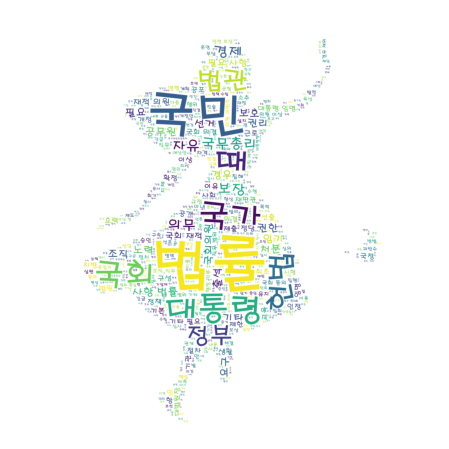

In [45]:
wordcloud = WordCloud(background_color='white',
                      max_words = 700,
                      font_path = 'C:/Windows/Fonts/HYPost/H2PORM.TTF',
                      relative_scaling=0.1,
                      mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')

In [47]:
#생성된 워드 클라우드 저장
wordcloud.to_file('test3_worldcloud.png')

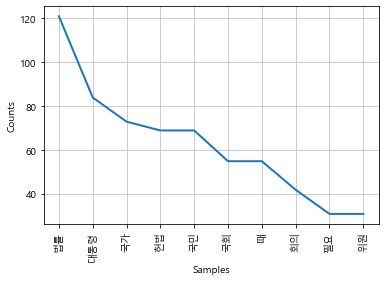

In [51]:
# 6. 단어 빈도수 시각화(Text)
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
kka = Kkma()
tagged_data = kka.pos(data) #ntags 디폴트 값이 30
nouns_list = [t[0] for t in tagged_data if t[1]=='NNG']
plt.rc("font", family="Malgun Gothic")
nltk.Text(nouns_list).plot(10)

# 7. 워드 임베딩
- 단어간 유사성 도출

In [54]:
# 뉴스 기사 link들 가져와서 웹크롤링 -> 명사 추출 -> 단어간 거리
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.joins.com//RSS/economy.xml'
jtbc_economy = requests.get(rss_url)
soup = BeautifulSoup(jtbc_economy.content, 'xml')
link_el = soup.select('item > link')
link_list = [link.text for link in link_el]


['https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020546',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020508',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020509',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020387',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020390',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020349',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020351',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020353',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020247',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020214',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020215',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020233',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020149',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB120

In [57]:
# 각 링크들의 뉴스기사들 명사만 뽑기
from konlpy.tag import Kkma
kkma = Kkma()
news = []
# [[명사1, ..], [명사1, ..],...]
for link in link_list:
    response = requests.get(link)
    news_soup = BeautifulSoup(response.content, "html.parser")
    title = news_soup.select_one('div.title > h3#jtbcBody').text
    content = news_soup.select_one('div#articlebody').text
    nouns_list = kkma.nouns(title+content)
    news.append(nouns_list)


In [58]:
print('뉴스당 명사 갯수 :', [len(n) for n in news])

뉴스당 명사 갯수 : [117, 142, 161, 141, 186, 154, 192, 156, 108, 236, 191, 159, 113, 228, 166, 171, 140, 217, 127, 212]


In [ ]:
# 워드 임베딩하기(단어간 거리 계산)
# pip install gensim 하기

In [61]:
from gensim.models import Word2Vec
model = Word2Vec(news, window=5, min_count=2, workers=-1)

In [62]:
model.wv.most_similar('코로나')

[('실현', 0.31485581398010254),
 ('공정위', 0.23949123919010162),
 ('소비자', 0.22985197603702545),
 ('황', 0.229280024766922),
 ('가지', 0.22199085354804993),
 ('집', 0.21951183676719666),
 ('지급', 0.20762406289577484),
 ('기업', 0.20674091577529907),
 ('이하', 0.20567741990089417),
 ('증가세', 0.19470304250717163)]

In [64]:
model.wv.most_similar('집', topn=5)

[('보수', 0.2940482795238495),
 ('백만', 0.255465030670166),
 ('노총', 0.24151058495044708),
 ('국민', 0.2207440882921219),
 ('코로나', 0.21951183676719666)]